In [79]:
import pandas as pd
import numpy as np
from sklearn.neighbors  import KNeighborsClassifier
#from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


In [80]:
from sklearn.datasets import load_iris
data = load_iris()
data1 = pd.DataFrame(data.data, columns=data.feature_names) 
data1['species']= data.target_names[data.target]
data=data1  


In [81]:
iris_data=data.iloc[:,0:4].values
target=data.iloc[:,4].values
target


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [82]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
y=le.fit_transform(target)
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [83]:
X_train,X_test,y_train,y_test = train_test_split(iris_data,y,test_size=80,random_state=0)


In [84]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
neighbors
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [85]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)


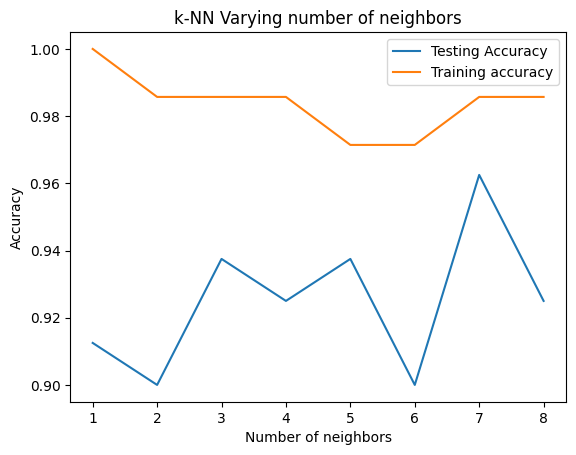

In [86]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [87]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [88]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)


0.9625

In [89]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)


array([[23,  0,  0],
       [ 0, 31,  1],
       [ 0,  2, 23]])

In [90]:

#Confusion matrix can also be obtained using crosstab method of pandas.
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,2,All
True,,,,
0,23,0,0,23
1,0,31,1,32
2,0,2,23,25
All,23,33,24,80


In [91]:
kfold = KFold(n_splits=10)
kfold_model=KNeighborsClassifier(n_neighbors=7)
results_kfold = model_selection.cross_val_score(kfold_model, iris_data,target, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))


Accuracy: 93.33%


In [92]:
skfold = StratifiedKFold(n_splits=3)
model_skfold = KNeighborsClassifier(n_neighbors=7)
results_skfold = model_selection.cross_val_score(model_skfold,iris_data,target, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))


Accuracy: 97.33%


**Example 2:**
Using GridSearchCV()

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier


In [94]:
iris = load_iris()

X = iris.data
y = iris.target


In [96]:
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [97]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)


0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


In [98]:
best_model=grid.best_estimator_
print(best_model)


KNeighborsClassifier(n_neighbors=13)
